In [27]:
import pandas as pd
import matplotlib.pyplot as plt


#Importing 2014 trip data into dataframes
apr14 = pd.read_csv(r'C:\Users\User\Uber\uber-raw-data-apr14.csv')
may14 = pd.read_csv(r'C:\Users\User\Uber\uber-raw-data-may14.csv')
jun14 = pd.read_csv(r'C:\Users\User\Uber\uber-raw-data-jun14.csv')
jul14 = pd.read_csv(r'C:\Users\User\Uber\uber-raw-data-jul14.csv')
aug14 = pd.read_csv(r'C:\Users\User\Uber\uber-raw-data-aug14.csv')
sep14 = pd.read_csv(r'C:\Users\User\Uber\uber-raw-data-sep14.csv')

In [28]:
#Concatinating 2014 trip data into single file
tripdata14 = pd.concat([apr14, may14, jun14, jul14, aug14, sep14])

In [3]:
tripdata14.count()

Date/Time    4534327
Lat          4534327
Lon          4534327
Base         4534327
dtype: int64

In [43]:
#Importing 2015 trip data into dataframes
tripdata15 = pd.read_csv(r'C:\Users\User\Uber\uber-raw-data-janjune-15.csv')

In [44]:
tripdata15=tripdata15.dropna(axis=0, how='any')

In [46]:
tripdata15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [45]:
tripdata15.count()

Dispatching_base_num    14108284
Pickup_date             14108284
Affiliated_base_num     14108284
locationID              14108284
dtype: int64

In [31]:
tripdata14['Date/Time'] = pd.to_datetime(tripdata14['Date/Time'], format="%m/%d/%Y %H:%M:%S")
tripdata14['DayOfWeekNum'] = tripdata14['Date/Time'].dt.dayofweek
tripdata14['DayOfWeek'] = tripdata14['Date/Time'].dt.weekday_name
tripdata14['MonthDayNum'] = tripdata14['Date/Time'].dt.day
tripdata14['HourOfDay'] = tripdata14['Date/Time'].dt.hour
tripdata14['NameofMonth'] = tripdata14['Date/Time'].dt.month

In [33]:
tripdata14.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,NameofMonth
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0,4


In [34]:
plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['figure.dpi'] = 150

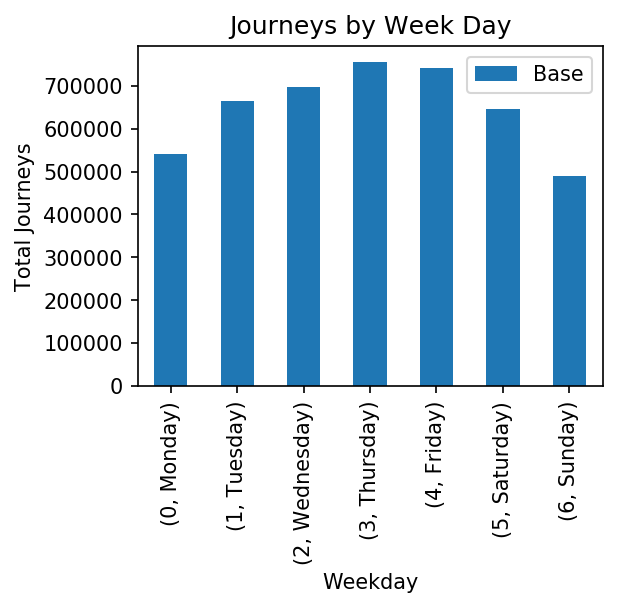

In [35]:
weekday_uber = tripdata14.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
weekday_uber.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');

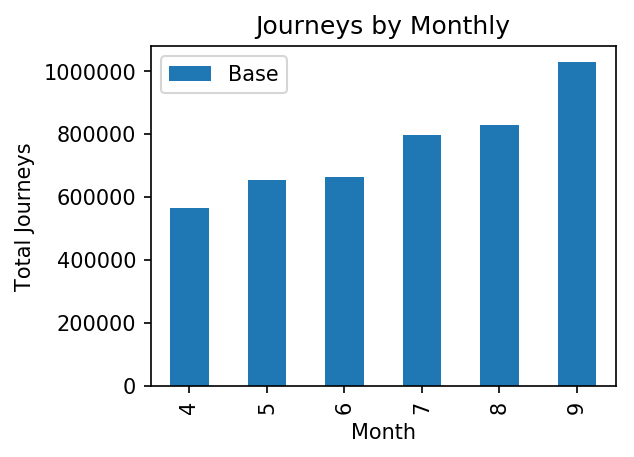

In [38]:
month_uber = tripdata14.pivot_table(index=['NameofMonth'],
                                  values='Base',
                                  aggfunc='count')
month_uber.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Journeys')
plt.title('Journeys by Monthly');

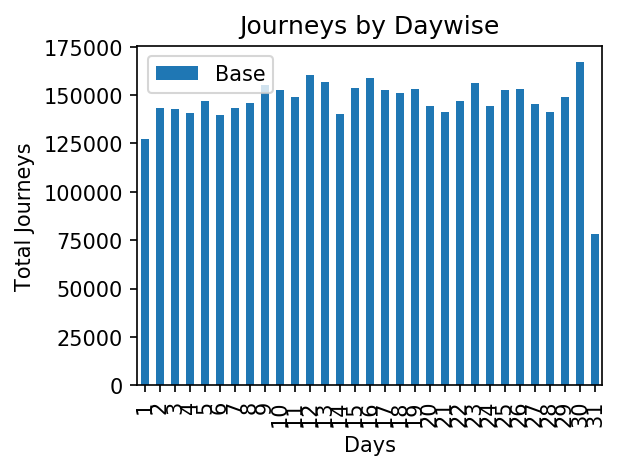

In [39]:
month_uber = tripdata14.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
month_uber.plot(kind='bar')
plt.xlabel('Days')
plt.ylabel('Total Journeys')
plt.title('Journeys by Daywise');

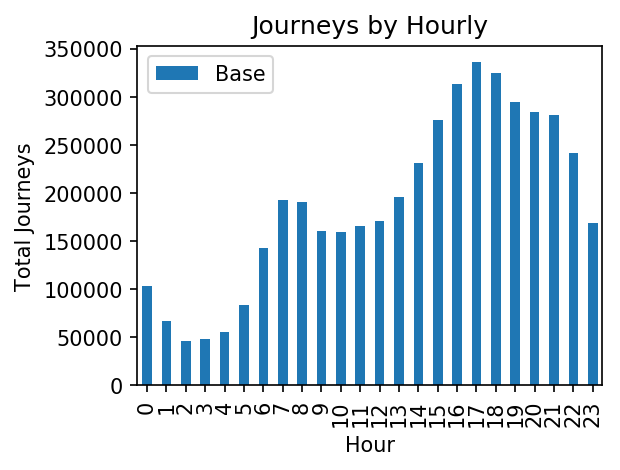

In [41]:
month_uber = tripdata14.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
month_uber.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Total Journeys')
plt.title('Journeys by Hourly');